# Import Library Yang Dibutuhkan

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

#Pengambilan Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marvinsssas","key":"7ad1267e5c92ee791de56de0c7cd2a18"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download japkeeratsingh/youtube-videos-and-the-comments

Dataset URL: https://www.kaggle.com/datasets/japkeeratsingh/youtube-videos-and-the-comments
License(s): CC0-1.0
  0% 0.00/44.7M [00:00<?, ?B/s]
100% 44.7M/44.7M [00:00<00:00, 1.34GB/s]


In [ ]:
with zipfile.ZipFile('/content/youtube-videos-and-the-comments.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Memuat Data dalam dataframe




In [ ]:
df = pd.read_csv('/content/YT_Videos_Comments.csv')
df_komentar = df[df['Video Title'] == 'The REAL Cure for Cancer'][['Comment (Actual)']]
df_komentar.head()

/tmp/ipython-input-8-4071939249.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/YT_Videos_Comments.csv')


,Comment (Actual)
110,Their is no such thing as Cancer or Diseases. ...
111,Your pretty face is a cure 😍
112,You’re still not looking at the root cause
113,Look at what you’re in taking to get rid of ca...
114,"Look up ""German new medicine"" cancer is not wh..."


# Preprosessing Data

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Fungsi bersih + tokenisasi + stemming
def clean_and_tokenize(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in filtered]
    return stemmed

df_komentar['stemmed'] = df_komentar['Comment (Actual)'].apply(clean_and_tokenize)
df_komentar.head()

,Comment (Actual),stemmed
110,Their is no such thing as Cancer or Diseases. ...,"[thing, cancer, diseas, alreadi, cure, tell, w..."
111,Your pretty face is a cure 😍,"[pretti, face, cure]"
112,You’re still not looking at the root cause,"[your, still, look, root, caus]"
113,Look at what you’re in taking to get rid of ca...,"[look, your, take, get, rid, cancer, stop, eat..."
114,"Look up ""German new medicine"" cancer is not wh...","[look, german, new, medicin, cancer, say, peop..."


# Analisa Sentimen

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

df_komentar['sentiment_vader'] = df_komentar['stemmed'].apply(lambda tokens: analyzer.polarity_scores(' '.join(tokens)))

# Extract positive, negative, and neutral scores
df_komentar['sentiment_positive'] = df_komentar['sentiment_vader'].apply(lambda scores: scores['pos'])
df_komentar['sentiment_negative'] = df_komentar['sentiment_vader'].apply(lambda scores: scores['neg'])
df_komentar['sentiment_neutral'] = df_komentar['sentiment_vader'].apply(lambda scores: scores['neu'])
df_komentar['sentiment_compound'] = df_komentar['sentiment_vader'].apply(lambda scores: scores['compound'])

df_komentar['sentiment_label'] = df_komentar['sentiment_compound'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))
df_komentar['sentiment_score'] = df_komentar['sentiment_compound'].apply(lambda score: 1 if score > 0 else ('0' if score < 0 else 2))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_komentar.dropna()

,Comment (Actual),stemmed,sentiment_vader,sentiment_positive,sentiment_negative,sentiment_neutral,sentiment_compound,sentiment_label,sentiment_score
110,Their is no such thing as Cancer or Diseases. ...,"[thing, cancer, diseas, alreadi, cure, tell, w...","{'neg': 0.536, 'neu': 0.337, 'pos': 0.127, 'co...",0.127,0.536,0.337,-0.8660,negative,0
111,Your pretty face is a cure 😍,"[pretti, face, cure]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2
112,You’re still not looking at the root cause,"[your, still, look, root, caus]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2
113,Look at what you’re in taking to get rid of ca...,"[look, your, take, get, rid, cancer, stop, eat...","{'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'comp...",0.000,0.398,0.602,-0.7650,negative,0
114,"Look up ""German new medicine"" cancer is not wh...","[look, german, new, medicin, cancer, say, peop...","{'neg': 0.43, 'neu': 0.35, 'pos': 0.22, 'compo...",0.220,0.430,0.350,-0.7910,negative,0
...,...,...,...,...,...,...,...,...,...
1140,Cancer and poverty should be our top prioritie...,"[cancer, poverti, top, prioriti, believ, cance...","{'neg': 0.407, 'neu': 0.509, 'pos': 0.083, 'co...",0.083,0.407,0.509,-0.8402,negative,0
1141,Woohoo! a real video! (not a short),"[woohoo, real, video, short]","{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.524,0.000,0.476,0.5106,positive,1
1142,"imho too much b-roll, quick takes, fast transi...","[imho, much, broll, quick, take, fast, transit...","{'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'comp...",0.495,0.000,0.505,0.9287,positive,1
1143,Finally long video and 1st comment,"[final, long, video, 1st, comment]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2


In [ ]:
print(df_komentar['sentiment_label'].value_counts())

sentiment_label
negative    486
positive    340
neutral     209
Name: count, dtype: int64


/tmp/ipython-input-14-42668146.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_komentar, x='sentiment_label', palette='pastel')


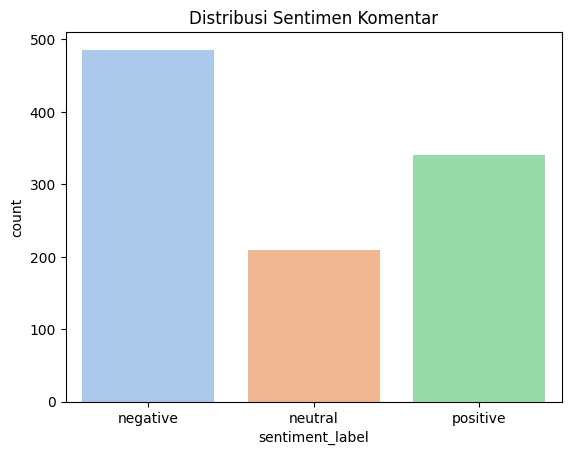

In [ ]:
sns.countplot(data=df_komentar, x='sentiment_label', palette='pastel')
plt.title('Distribusi Sentimen Komentar')
plt.show()

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

df_komentar['pos_tags'] = df_komentar['stemmed'].apply(lambda tokens: ' '.join([t.pos_ for t in nlp(' '.join(tokens))]))
df_komentar['pos_tags'].head()

,pos_tags
110,NOUN NOUN NOUN NOUN NOUN NOUN AUX PART VERB AD...
111,NOUN NOUN NOUN
112,PRON ADV VERB NOUN NOUN
113,VERB PRON NOUN VERB VERB NOUN NOUN VERB NOUN N...
114,VERB ADJ ADJ PROPN NOUN VERB NOUN AUX PART VER...


In [ ]:
from nltk import ngrams

df_komentar['bigrams'] = df_komentar['stemmed'].apply(lambda tokens: list(ngrams(tokens, 2)))
df_komentar['bigrams']

,bigrams
110,"[(thing, cancer), (cancer, diseas), (diseas, a..."
111,"[(pretti, face), (face, cure)]"
112,"[(your, still), (still, look), (look, root), (..."
113,"[(look, your), (your, take), (take, get), (get..."
114,"[(look, german), (german, new), (new, medicin)..."
...,...
1140,"[(cancer, poverti), (poverti, top), (top, prio..."
1141,"[(woohoo, real), (real, video), (video, short)]"
1142,"[(imho, much), (much, broll), (broll, quick), ..."
1143,"[(final, long), (long, video), (video, 1st), (..."


In [ ]:
from collections import Counter

df_komentar['word_counts'] = df_komentar['stemmed'].apply(lambda tokens: Counter(tokens))
df_komentar['word_counts']

,word_counts
110,"{'thing': 1, 'cancer': 1, 'diseas': 1, 'alread..."
111,"{'pretti': 1, 'face': 1, 'cure': 1}"
112,"{'your': 1, 'still': 1, 'look': 1, 'root': 1, ..."
113,"{'look': 1, 'your': 1, 'take': 1, 'get': 1, 'r..."
114,"{'look': 1, 'german': 1, 'new': 1, 'medicin': ..."
...,...
1140,"{'cancer': 2, 'poverti': 1, 'top': 1, 'priorit..."
1141,"{'woohoo': 1, 'real': 1, 'video': 1, 'short': 1}"
1142,"{'imho': 1, 'much': 1, 'broll': 1, 'quick': 1,..."
1143,"{'final': 1, 'long': 1, 'video': 1, '1st': 1, ..."


In [ ]:
df_komentar

,Comment (Actual),stemmed,sentiment_vader,sentiment_positive,sentiment_negative,sentiment_neutral,sentiment_compound,sentiment_label,sentiment_score,pos_tags,bigrams,word_counts
110,Their is no such thing as Cancer or Diseases. ...,"[thing, cancer, diseas, alreadi, cure, tell, w...","{'neg': 0.536, 'neu': 0.337, 'pos': 0.127, 'co...",0.127,0.536,0.337,-0.8660,negative,0,NOUN NOUN NOUN NOUN NOUN NOUN AUX PART VERB AD...,"[(thing, cancer), (cancer, diseas), (diseas, a...","{'thing': 1, 'cancer': 1, 'diseas': 1, 'alread..."
111,Your pretty face is a cure 😍,"[pretti, face, cure]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2,NOUN NOUN NOUN,"[(pretti, face), (face, cure)]","{'pretti': 1, 'face': 1, 'cure': 1}"
112,You’re still not looking at the root cause,"[your, still, look, root, caus]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2,PRON ADV VERB NOUN NOUN,"[(your, still), (still, look), (look, root), (...","{'your': 1, 'still': 1, 'look': 1, 'root': 1, ..."
113,Look at what you’re in taking to get rid of ca...,"[look, your, take, get, rid, cancer, stop, eat...","{'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'comp...",0.000,0.398,0.602,-0.7650,negative,0,VERB PRON NOUN VERB VERB NOUN NOUN VERB NOUN N...,"[(look, your), (your, take), (take, get), (get...","{'look': 1, 'your': 1, 'take': 1, 'get': 1, 'r..."
114,"Look up ""German new medicine"" cancer is not wh...","[look, german, new, medicin, cancer, say, peop...","{'neg': 0.43, 'neu': 0.35, 'pos': 0.22, 'compo...",0.220,0.430,0.350,-0.7910,negative,0,VERB ADJ ADJ PROPN NOUN VERB NOUN AUX PART VER...,"[(look, german), (german, new), (new, medicin)...","{'look': 1, 'german': 1, 'new': 1, 'medicin': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1140,Cancer and poverty should be our top prioritie...,"[cancer, poverti, top, prioriti, believ, cance...","{'neg': 0.407, 'neu': 0.509, 'pos': 0.083, 'co...",0.083,0.407,0.509,-0.8402,negative,0,NOUN NOUN NOUN PROPN PROPN NOUN NOUN VERB ADJ ...,"[(cancer, poverti), (poverti, top), (top, prio...","{'cancer': 2, 'poverti': 1, 'top': 1, 'priorit..."
1141,Woohoo! a real video! (not a short),"[woohoo, real, video, short]","{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.524,0.000,0.476,0.5106,positive,1,VERB ADJ NOUN ADJ,"[(woohoo, real), (real, video), (video, short)]","{'woohoo': 1, 'real': 1, 'video': 1, 'short': 1}"
1142,"imho too much b-roll, quick takes, fast transi...","[imho, much, broll, quick, take, fast, transit...","{'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'comp...",0.495,0.000,0.505,0.9287,positive,1,PROPN ADV ADV ADJ VERB ADJ NOUN ADJ NOUN ADJ N...,"[(imho, much), (much, broll), (broll, quick), ...","{'imho': 1, 'much': 1, 'broll': 1, 'quick': 1,..."
1143,Finally long video and 1st comment,"[final, long, video, 1st, comment]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2,ADJ ADJ NOUN ADJ NOUN,"[(final, long), (long, video), (video, 1st), (...","{'final': 1, 'long': 1, 'video': 1, '1st': 1, ..."


In [ ]:
from wordcloud import WordCloud

# Descriptive statistics
print(df_komentar['Comment (Actual)'].str.len().describe())

count    1035.000000
mean      241.153623
std       349.452781
min         2.000000
25%        54.000000
50%       123.000000
75%       282.500000
max      4356.000000
Name: Comment (Actual), dtype: float64


In [ ]:
from collections import Counter
# Word frequencies
word_counts = Counter(df_komentar['stemmed'].sum())
print(word_counts.most_common(20))

[('cancer', 908), ('video', 244), ('peopl', 213), ('cure', 196), ('like', 194), ('get', 191), ('detect', 159), ('earli', 140), ('would', 140), ('dont', 136), ('bodi', 126), ('one', 125), ('cell', 121), ('make', 118), ('year', 117), ('treatment', 117), ('mri', 116), ('test', 106), ('go', 102), ('know', 102)]


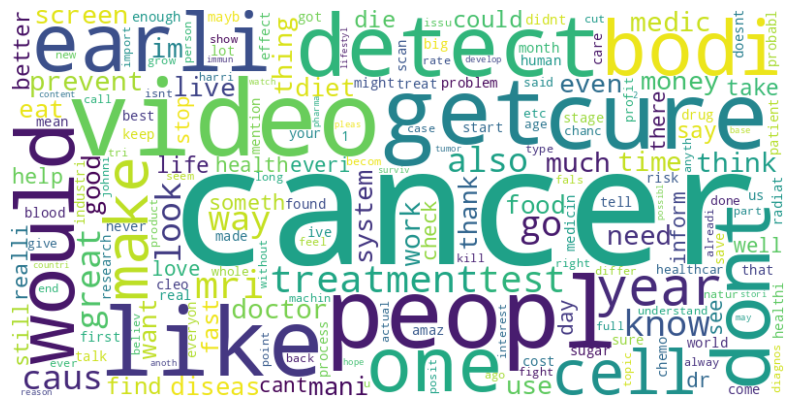

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

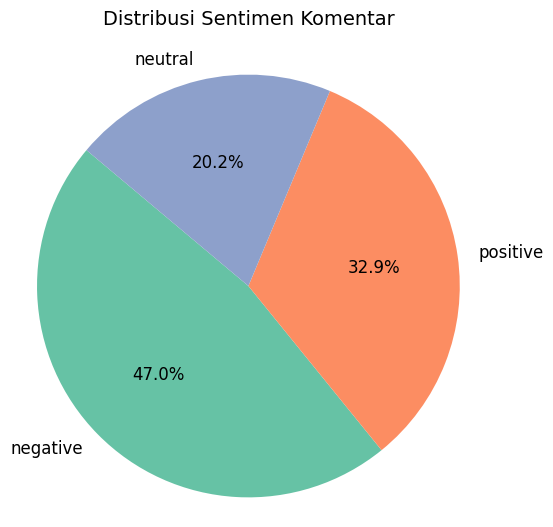

In [ ]:
sentiment_counts = df_komentar['sentiment_label'].value_counts()

colors = ['#66c2a5', '#fc8d62', '#8da0cb']
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Distribusi Sentimen Komentar\n', fontsize=14)
plt.axis('equal')
plt.show()

In [ ]:
df_komentar['sentiment_label'].value_counts()

,count
sentiment_label,
negative,486
positive,340
neutral,209


In [ ]:
df_komentar = df_komentar.astype(str)
df_komentar.drop_duplicates()
print(df_komentar.duplicated().sum())
df_komentar.dropna().head()

8


,Comment (Actual),stemmed,sentiment_vader,sentiment_positive,sentiment_negative,sentiment_neutral,sentiment_compound,sentiment_label,sentiment_score,pos_tags,bigrams,word_counts
110,Their is no such thing as Cancer or Diseases. ...,"['thing', 'cancer', 'diseas', 'alreadi', 'cure...","{'neg': 0.536, 'neu': 0.337, 'pos': 0.127, 'co...",0.127,0.536,0.337,-0.866,negative,0,NOUN NOUN NOUN NOUN NOUN NOUN AUX PART VERB AD...,"[('thing', 'cancer'), ('cancer', 'diseas'), ('...","Counter({'thing': 1, 'cancer': 1, 'diseas': 1,..."
111,Your pretty face is a cure 😍,"['pretti', 'face', 'cure']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,neutral,2,NOUN NOUN NOUN,"[('pretti', 'face'), ('face', 'cure')]","Counter({'pretti': 1, 'face': 1, 'cure': 1})"
112,You’re still not looking at the root cause,"['your', 'still', 'look', 'root', 'caus']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,neutral,2,PRON ADV VERB NOUN NOUN,"[('your', 'still'), ('still', 'look'), ('look'...","Counter({'your': 1, 'still': 1, 'look': 1, 'ro..."
113,Look at what you’re in taking to get rid of ca...,"['look', 'your', 'take', 'get', 'rid', 'cancer...","{'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'comp...",0.0,0.398,0.602,-0.765,negative,0,VERB PRON NOUN VERB VERB NOUN NOUN VERB NOUN N...,"[('look', 'your'), ('your', 'take'), ('take', ...","Counter({'look': 1, 'your': 1, 'take': 1, 'get..."
114,"Look up ""German new medicine"" cancer is not wh...","['look', 'german', 'new', 'medicin', 'cancer',...","{'neg': 0.43, 'neu': 0.35, 'pos': 0.22, 'compo...",0.22,0.43,0.35,-0.791,negative,0,VERB ADJ ADJ PROPN NOUN VERB NOUN AUX PART VER...,"[('look', 'german'), ('german', 'new'), ('new'...","Counter({'cancer': 2, 'peopl': 2, 'die': 2, 'l..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X_train, X_test, y_train, y_test = train_test_split(df_komentar['stemmed'], df_komentar['sentiment_label'], test_size=0.2, random_state=42)

sentiment_counts = y_train.value_counts()
print(sentiment_counts)

if sentiment_counts.min() / sentiment_counts.max() < 0.3:
    X_train_over, y_train_over = resample(X_train[y_train == sentiment_counts.idxmin()],
                                          y_train[y_train == sentiment_counts.idxmin()],
                                          replace=True,
                                          n_samples=sentiment_counts.max())
    X_train = pd.concat([X_train, X_train_over])
    y_train = pd.concat([y_train, y_train_over])
else:
    pass

print(y_train.value_counts())

sentiment_label
negative    398
positive    264
neutral     166
Name: count, dtype: int64
sentiment_label
negative    398
positive    264
neutral     166
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df_komentar['stemmed'],df_komentar['sentiment_label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features from cleaned reviews
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC # "Support vector classifier"
# Train the model
model_svm = SVC(kernel='linear', C=1E10)
model_svm.fit(X_train_features, y_train)

SVC(C=10000000000.0, kernel='linear')

Accuracy: 0.7729
Precision: 0.7748
Recall: 0.7729
F1-score: 0.7709

== Laporan Klasifikasi Tiap Kelas ==
              precision    recall  f1-score   support

    negative       0.77      0.85      0.81        88
    positive       0.74      0.79      0.76        43
     neutral       0.80      0.67      0.73        76

    accuracy                           0.77       207
   macro avg       0.77      0.77      0.77       207
weighted avg       0.77      0.77      0.77       207



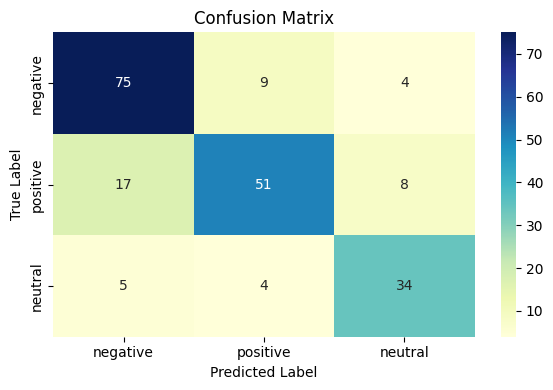

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict sentiment on test data
y_pred = model_svm.predict(X_test_features)

# Evaluate model performance using accuracy, precision, recall, and F1-score
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average="weighted")
recall_svm = recall_score(y_test, y_pred, average="weighted")
f1_svm = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

print("\n== Laporan Klasifikasi Tiap Kelas ==")
print(classification_report(y_test, y_pred, target_names=labels))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_features, y_train)
y_pred_log = log_model.predict(X_test_features)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average="weighted", zero_division=0)
recall_log = recall_score(y_test, y_pred_log, average="weighted", zero_division=0)
f1_log = f1_score(y_test, y_pred_log, average="weighted", zero_division=0)

print("=== Evaluasi Logistic Regression ===")
print(f"Accuracy : {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall   : {recall_log:.4f}")
print(f"F1-score : {f1_log:.4f}")

# Laporan per kelas
print("\n== Laporan Klasifikasi Tiap Kelas ==")
print(classification_report(y_test, y_pred_log, target_names=labels, zero_division=0))


=== Evaluasi Logistic Regression ===
Accuracy : 0.7488
Precision: 0.7775
Recall   : 0.7488
F1-score : 0.7325

== Laporan Klasifikasi Tiap Kelas ==
              precision    recall  f1-score   support

    negative       0.69      0.99      0.81        88
    positive       0.86      0.42      0.56        43
     neutral       0.83      0.66      0.74        76

    accuracy                           0.75       207
   macro avg       0.79      0.69      0.70       207
weighted avg       0.78      0.75      0.73       207



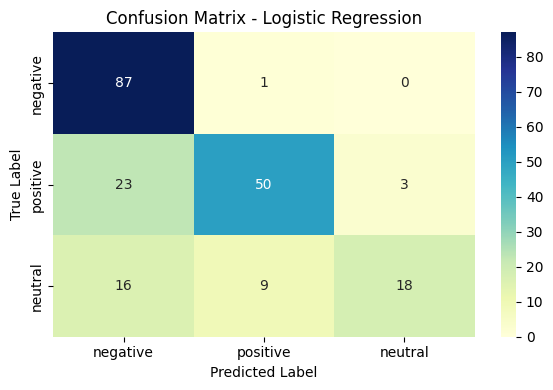

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


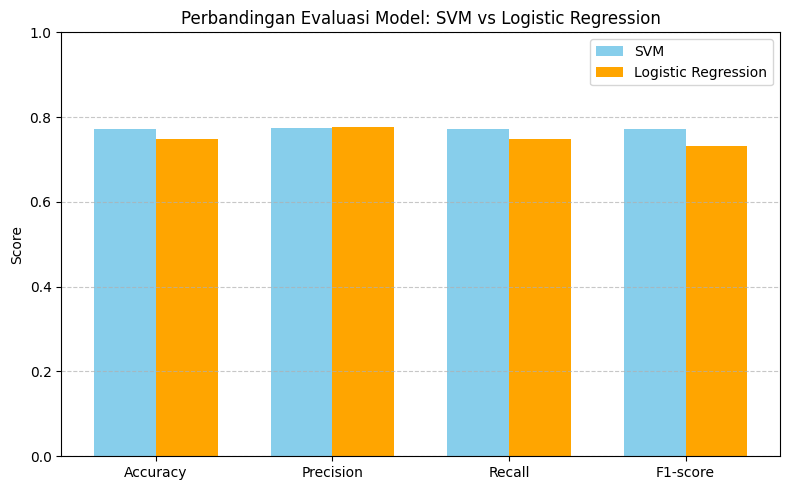

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
svm_scores = [accuracy_svm, precision_svm, recall_svm, f1_svm]
log_scores = [accuracy_log, precision_log, recall_log, f1_log]

x = np.arange(len(metrics))  # posisi label
width = 0.35  # lebar bar

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, svm_scores, width, label='SVM', color='skyblue')
plt.bar(x + width/2, log_scores, width, label='Logistic Regression', color='orange')

# Label dan tampilan
plt.ylabel('Score')
plt.title('Perbandingan Evaluasi Model: SVM vs Logistic Regression')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
